In [1]:
# Setup environment
!pip install pandas numpy matplotlib
!pip install tensorflow
# !pip install -q keras
# !pip install keras

In [2]:
import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras import Sequential

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import copy
import csv
import math
import cmath
import time
import random as python_random

# reproduciable results
def reset_seeds():
   np.random.seed(7) 
   python_random.seed(7)
   tf.random.set_seed(7)  

inFilename = "Input_Yo20op1084_ana_bw20_50.csv"
outFilename = "Output_Yo20op1084_ana_bw20_50.csv"
input = pd.read_csv(inFilename,header=None)
output = pd.read_csv(outFilename,header=None)
inputRawTrain = []
outputRawTrain = []
inputRawTrain = np.array(input)
outputRawTrain = np.array(output)

inFilename = "Input_Yo20op40_ana_50.csv"
outFilename = "Output_Yo20op40_ana_50.csv"
input = pd.read_csv(inFilename,header=None)
output = pd.read_csv(outFilename,header=None)
inputTrain_1 = []
outputTrain_1 = []
inputTrain_1 = np.array(input)
outputTrain_1 = np.array(output)

num_inputs_train = len(inputTrain_1)
print("Total Number of Training Dataset is:",num_inputs_train)

# Shuffle the dataset
np.random.seed(1)
np.random.shuffle(inputTrain_1)
np.random.seed(1)
np.random.shuffle(outputTrain_1)

# Data separation
TRAIN_SPLIT_1 = int(0.7 * num_inputs_train)
TRAIN_SPLIT_2 = int(0.85 * num_inputs_train)
inputTrain, inputTest, inputs_test_2 = np.split(inputTrain_1, [TRAIN_SPLIT_1, TRAIN_SPLIT_2])
outputTrain, outputTest, outputs_test_2 = np.split(outputTrain_1, [TRAIN_SPLIT_1, TRAIN_SPLIT_2])

# TRAIN_SPLIT_1 = int(0.7 * num_inputs_train)
# inputTrain, inputTest = np.split(inputTrain_1, [TRAIN_SPLIT_1])
# outputTrain, outputTest = np.split(outputTrain_1, [TRAIN_SPLIT_1])

# inFilename = "Input_Ydq50op171.csv"
# outFilename = "Output_Ydq50op171.csv"
# input = pd.read_csv(inFilename,header=None)
# output = pd.read_csv(outFilename,header=None)
# inputTest = []
# outputTest = []
# inputTest = np.array(input)
# outputTest = np.array(output)

print("Dataset preparation complete!")

Total Number of Training Dataset is: 800
Dataset preparation complete!


In [3]:
CYCLE = 10
# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation

num_inputRawTrain = len(inputRawTrain)
num_inputTrain = len(inputTrain)
num_inputTest = len(inputTest)
inputs_test = inputTest
outputs_test = outputTest

print("Total Number of Raw Training Dataset is:",num_inputRawTrain)
print("Total Number of Real Training Dataset is:",num_inputTrain)
print("Total Number of Test Dataset is:",num_inputTest)


inputs_train_raw = []
outputs_train_raw = []
inputs_train_real = []
outputs_train_real = []


for x in range(CYCLE):
  tempInput_raw = copy.deepcopy(inputRawTrain)
  tempOutput_raw = copy.deepcopy(outputRawTrain)
  tempInput_real = copy.deepcopy(inputTrain)
  tempOutput_real = copy.deepcopy(outputTrain)

  np.random.seed(x+1)
  np.random.shuffle(tempInput_raw)
  np.random.seed(x+1)
  np.random.shuffle(tempOutput_raw)
  inputs_train_raw.append(tempInput_raw)
  outputs_train_raw.append(tempOutput_raw)
    
  np.random.seed(x+1)
  np.random.shuffle(tempInput_real)
  np.random.seed(x+1)
  np.random.shuffle(tempOutput_real)
  inputs_train_real.append(tempInput_real)
  outputs_train_real.append(tempOutput_real)

print("Dataset randomization and separation complete!")

Total Number of Raw Training Dataset is: 21680
Total Number of Real Training Dataset is: 560
Total Number of Test Dataset is: 120
Dataset randomization and separation complete!


In [4]:
print(inputs_train_real[0][0:1])
print(inputs_train_real[0][0:3])
print(inputs_train_real[9][0:3])
print(inputs_train_raw[0][0:3])
#print(inputs_train_real[0][1:10])
#print(inputs_train_real[0][1:5])
#print(inputs_train_real)
# print(inputs_train_real[1][1:15])
# inputs_train_real[1][1:10]
# inputs_train_real[1][1:15]

[[ 1.   1.   0.  -0.5]]
[[ 1.          1.          0.         -0.5       ]
 [ 1.31578947  0.9        -0.5        -0.5       ]
 [ 4.          1.          1.          0.        ]]
[[150.           1.          -0.5          0.        ]
 [200.           1.1         -0.5         -1.        ]
 [  1.75438596   1.1          1.           0.        ]]
[[ 5.35714286  1.1        -0.6        -0.1       ]
 [ 1.31578947  1.         -0.4         0.4       ]
 [66.66666667  0.9        -0.6         0.1       ]]


In [5]:
print(outputs_train_real[0][0:2])
print(outputs_train_real[0][0:1,[0,2,4,6]])
print(outputs_train_real[0][0:1])

[[ 1.06964822e-04  4.58140711e-03 -3.27723204e-02  1.28410878e-04
   2.63600858e-05 -1.24396795e-06 -2.49045204e-05 -8.91967503e-05]
 [ 1.85137792e-04  6.02606771e-03 -4.11602529e-02  4.03840853e-04
   4.55854503e-05 -2.83188237e-06  4.10855010e-02 -6.26503797e-04]]
[[ 1.06964822e-04 -3.27723204e-02  2.63600858e-05 -2.49045204e-05]]
[[ 1.06964822e-04  4.58140711e-03 -3.27723204e-02  1.28410878e-04
   2.63600858e-05 -1.24396795e-06 -2.49045204e-05 -8.91967503e-05]]


In [6]:
# Set learning rate
initial_learning_rate = 0.020669824682365133
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=375*65,
    decay_rate=0.575401007701697,
    staircase=True)

# Normalization layer definition
Normlayer1=tf.keras.layers.Normalization()
Normlayer1.adapt(inputRawTrain)

# build and then train the model
def train_model(model,inputs_train,outputs_train,num_epoch):
    model.add(Normlayer1)
    model.add(tf.keras.layers.Dense(43, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(56, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(43, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(8))
    opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
#   model.compile(optimizer=opt, loss='mse', metrics=['mse'])
    model.compile(optimizer=opt, loss='mse', metrics=['mse'])
#   checkpoint_filepath = './checkpoint/weights.hdf5'
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
#       save_weights_only=True,
        verbose = 1,
        monitor='val_mse',
        mode='auto',
        save_best_only=True)

    history = model.fit(inputs_train, outputs_train, epochs=num_epoch, batch_size=16, validation_data=(inputs_test, outputs_test), callbacks=[model_checkpoint_callback])
    return history

# Use the model to predict test data
def predict_with_FNN(model,inputs_test,outputs_test):
#     model[index].summary()
    output_pred = model.predict(inputs_test)
    output_diff = output_pred - outputs_test
    AE = output_diff
    MAE = np.mean(abs(output_diff))
    MAE_1 =  np.mean(abs(output_pred[:,[0,2,4,6]] - outputs_test[:,[0,2,4,6]]))
    MAE_2 =  np.mean(abs(output_pred[:,[1,3,5,7]] - outputs_test[:,[1,3,5,7]]))
    MSE = np.square(np.subtract(output_pred,outputs_test)).mean()
    MSE_1 = np.square(np.subtract(output_pred[:,[0,2,4,6]],outputs_test[:,[0,2,4,6]])).mean()
    MSE_2 = np.square(np.subtract(output_pred[:,[1,3,5,7]],outputs_test[:,[1,3,5,7]])).mean()
    
#   MSE = model.evaluate(inputs_test,outputs_test,batch_size=64)
    pct_95th_error = np.percentile(abs(output_diff),95)
    std_error = np.std(output_diff)
    print("Mean Absolute Error(MAE): %.9f" % MAE)
    print("MAE conductance: %.9f" % MAE_1)
    print("MAE susceptance: %.9f" % MAE_2)
    print("95th Error: %.9f" % pct_95th_error)
    print("Standard Deviation: %.9f" % std_error)
    print("MSE: %.9f" % MSE)
    print("MSE conductance: %.9f" % MSE_1)
    print("MSE susceptance: %.9f" % MSE_2)
#     np.set_printoptions(precision=9)
    print("Absolute Error(first element, conductance):", np.around(AE[[0],[0,2,4,6]],9))
#     print("Absolute Error(first element, conductance):", np.around(AE,9))
    return MAE,MAE_1,MAE_2,pct_95th_error,std_error,MSE,MSE_1,MSE_2,AE

print("Training and prediction function definition complete!")

Training and prediction function definition complete!


In [7]:
EPOCHS = 500

# initialization/getting reproducible results
reset_seeds()

# Direct Train
mae_direct = []
mae_direct_iteration = []
mae_1_direct = []
mae_1_direct_iteration = []
mae_2_direct = []
mae_2_direct_iteration = []
pct95th_direct = []
pct95th_direct_iteration = []
std_direct = []
std_direct_iteration = []
mse_direct = []
mse_direct_iteration = []
mse_1_direct = []
mse_1_direct_iteration = []
mse_2_direct = []
mse_2_direct_iteration = []
ae_direct = []
ae_direct_iteration = []
# num_data_array = [1,10,20,50,100,200,500,1000,2000,3000]
# num_data_array = [50]
# num_data_array = [1,5,10,20,50,100,200,500,1000,2000]
# num_data_array = [20,100,200,300,500,700,1000,1500,1800,2000]
# num_data_array = [5,20,50,100,200,300,500,700,1000,2000]
# num_data_array = [20,50,100,200,300,500,700,1000,1500,2000]
# num_data_array = [20,40,60,80,100,300,500,700,900,1400]
# num_data_array = [20,50,100,200,300,500,700,900,1000,1400]
# num_data_array = [20,50,100,200,300,450,600,800,1100,1400]
# num_data_array = [10,30,50,100,150,200,300,400,500,550]
# num_data_array = [5,10,30,50,100,150,200,300,400,550]
# num_data_array = [1,5,10,30,50,100,200,300,400,550]
num_data_array = [5]
for x in range(len(num_data_array)):
    # Set learning rate
    initial_learning_rate = 0.020669824682365133
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate,
        decay_steps=math.ceil(num_data_array[x]/16)*65,
        decay_rate=0.575401007701697,
        staircase=True)
    
    mae_direct_iteration.append(num_data_array[x])
    mae_1_direct_iteration.append(num_data_array[x])
    mae_2_direct_iteration.append(num_data_array[x])
    pct95th_direct_iteration.append(num_data_array[x])
    std_direct_iteration.append(num_data_array[x])
    mse_direct_iteration.append(num_data_array[x])
    mse_1_direct_iteration.append(num_data_array[x])
    mse_2_direct_iteration.append(num_data_array[x])
    ae_direct_iteration.append(num_data_array[x])
    for num_train_iteration in range(1):
        inputs_train_real_cut = inputs_train_real[num_train_iteration][0:0+num_data_array[x]]
        outputs_train_real_cut = outputs_train_real[num_train_iteration][0:0+num_data_array[x]]
#         inputs_train_real_cut = inputs_train_real[num_train_iteration]
#         outputs_train_real_cut = outputs_train_real[num_train_iteration]
        
        model_direct = tf.keras.Sequential()
        checkpoint_filepath = './checkpoint/direct/direct_weights.hdf5' #
        history = train_model(model_direct,inputs_train_real_cut,outputs_train_real_cut,EPOCHS)
        model_direct.load_weights(checkpoint_filepath) # load the best model
        predict_results = predict_with_FNN(model_direct,inputs_test,outputs_test)
        print("Number of Data Trained: %.1f" % num_data_array[x])
        print("Iteration Times: %.1f" % num_train_iteration)
        
        mae_direct_iteration.append(predict_results[0])
        mae_1_direct_iteration.append(predict_results[1])
        mae_2_direct_iteration.append(predict_results[2])
        pct95th_direct_iteration.append(predict_results[3])
        std_direct_iteration.append(predict_results[4])
        mse_direct_iteration.append(predict_results[5])
        mse_1_direct_iteration.append(predict_results[6])
        mse_2_direct_iteration.append(predict_results[7])
        for i in range(num_inputTest):
            ae_direct_iteration.extend(predict_results[8][i])
        print()
        
    mae_direct.append(mae_direct_iteration)
    mae_direct_iteration = []
    mae_1_direct.append(mae_1_direct_iteration)
    mae_1_direct_iteration = []
    mae_2_direct.append(mae_2_direct_iteration)
    mae_2_direct_iteration = []
    pct95th_direct.append(pct95th_direct_iteration)
    pct95th_direct_iteration = []
    std_direct.append(std_direct_iteration)
    std_direct_iteration = []
    mse_direct.append(mse_direct_iteration)
    mse_direct_iteration = []
    mse_1_direct.append(mse_1_direct_iteration)
    mse_1_direct_iteration = []
    mse_2_direct.append(mse_2_direct_iteration)
    mse_2_direct_iteration = []
    ae_direct.append(ae_direct_iteration)
    ae_direct_iteration = []

Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 0.3169 - mse: 0.3169
Epoch 1: val_mse improved from inf to 0.12555, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 1s 861ms/step - loss: 0.3169 - mse: 0.3169 - val_loss: 0.1255 - val_mse: 0.1255
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 0.1306 - mse: 0.1306
Epoch 2: val_mse did not improve from 0.12555
1/1 [==============================] - 0s 42ms/step - loss: 0.1306 - mse: 0.1306 - val_loss: 0.1712 - val_mse: 0.1712
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 0.1724 - mse: 0.1724
Epoch 3: val_mse did not improve from 0.12555
1/1 [==============================] - 0s 36ms/step - loss: 0.1724 - mse: 0.1724 - val_loss: 0.1542 - val_mse: 0.1542
Epoch 4/500
1/1 [==============================] - ETA: 0s - loss: 0.1518 - mse: 0.1518
Epoch 4: val_mse improved from 0.12555 to 0.09732, saving model to ./checkpoint/direct\direct_weig

Epoch 31/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - mse: 0.0059
Epoch 31: val_mse did not improve from 0.00386
1/1 [==============================] - 0s 30ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 32/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - mse: 0.0051
Epoch 32: val_mse did not improve from 0.00386
1/1 [==============================] - 0s 32ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 33/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 33: val_mse improved from 0.00386 to 0.00298, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 353ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 34/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 34: val_mse improved from 0.00298 to 0.00237, saving model to ./checkpoint/direct

1/1 [==============================] - ETA: 0s - loss: 0.0011 - mse: 0.0011
Epoch 61: val_mse did not improve from 0.00194
1/1 [==============================] - 0s 31ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 62/500
1/1 [==============================] - ETA: 0s - loss: 0.0011 - mse: 0.0011
Epoch 62: val_mse did not improve from 0.00194
1/1 [==============================] - 0s 31ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 63/500
1/1 [==============================] - ETA: 0s - loss: 0.0011 - mse: 0.0011
Epoch 63: val_mse did not improve from 0.00194
1/1 [==============================] - 0s 30ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 64/500
1/1 [==============================] - ETA: 0s - loss: 0.0011 - mse: 0.0011
Epoch 64: val_mse did not improve from 0.00194
1/1 [==============================] - 0s 28ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0022 - val_mse: 0.00

1/1 [==============================] - ETA: 0s - loss: 7.4781e-04 - mse: 7.4781e-04
Epoch 90: val_mse did not improve from 0.00183
1/1 [==============================] - 0s 35ms/step - loss: 7.4781e-04 - mse: 7.4781e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 91/500
1/1 [==============================] - ETA: 0s - loss: 7.4083e-04 - mse: 7.4083e-04
Epoch 91: val_mse did not improve from 0.00183
1/1 [==============================] - 0s 33ms/step - loss: 7.4083e-04 - mse: 7.4083e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 92/500
1/1 [==============================] - ETA: 0s - loss: 7.3313e-04 - mse: 7.3313e-04
Epoch 92: val_mse did not improve from 0.00183
1/1 [==============================] - 0s 29ms/step - loss: 7.3313e-04 - mse: 7.3313e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 93/500
1/1 [==============================] - ETA: 0s - loss: 7.2464e-04 - mse: 7.2464e-04
Epoch 93: val_mse did not improve from 0.00183
1/1 [==============================] - 0s 35ms/step - loss:

1/1 [==============================] - ETA: 0s - loss: 5.3209e-04 - mse: 5.3209e-04
Epoch 116: val_mse improved from 0.00174 to 0.00173, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 332ms/step - loss: 5.3209e-04 - mse: 5.3209e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 117/500
1/1 [==============================] - ETA: 0s - loss: 5.2389e-04 - mse: 5.2389e-04
Epoch 117: val_mse improved from 0.00173 to 0.00172, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 330ms/step - loss: 5.2389e-04 - mse: 5.2389e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 118/500
1/1 [==============================] - ETA: 0s - loss: 5.1563e-04 - mse: 5.1563e-04
Epoch 118: val_mse improved from 0.00172 to 0.00171, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 343ms/step - loss: 5.1563e-04 - mse: 5.1563e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 119/50

1/1 [==============================] - 0s 361ms/step - loss: 3.6916e-04 - mse: 3.6916e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 141/500
1/1 [==============================] - ETA: 0s - loss: 3.6475e-04 - mse: 3.6475e-04
Epoch 141: val_mse improved from 0.00158 to 0.00157, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 329ms/step - loss: 3.6475e-04 - mse: 3.6475e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 142/500
1/1 [==============================] - ETA: 0s - loss: 3.6037e-04 - mse: 3.6037e-04
Epoch 142: val_mse improved from 0.00157 to 0.00157, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 148ms/step - loss: 3.6037e-04 - mse: 3.6037e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 143/500
1/1 [==============================] - ETA: 0s - loss: 3.5600e-04 - mse: 3.5600e-04
Epoch 143: val_mse improved from 0.00157 to 0.00157, saving model to ./checkpoint/direct\direct_weights.hdf

1/1 [==============================] - ETA: 0s - loss: 2.6572e-04 - mse: 2.6572e-04
Epoch 165: val_mse improved from 0.00148 to 0.00148, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 380ms/step - loss: 2.6572e-04 - mse: 2.6572e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 166/500
1/1 [==============================] - ETA: 0s - loss: 2.6195e-04 - mse: 2.6195e-04
Epoch 166: val_mse improved from 0.00148 to 0.00148, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 386ms/step - loss: 2.6195e-04 - mse: 2.6195e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 167/500
1/1 [==============================] - ETA: 0s - loss: 2.5821e-04 - mse: 2.5821e-04
Epoch 167: val_mse improved from 0.00148 to 0.00147, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 334ms/step - loss: 2.5821e-04 - mse: 2.5821e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 168/50

1/1 [==============================] - 0s 365ms/step - loss: 1.8508e-04 - mse: 1.8508e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 190/500
1/1 [==============================] - ETA: 0s - loss: 1.8220e-04 - mse: 1.8220e-04
Epoch 190: val_mse improved from 0.00140 to 0.00140, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 330ms/step - loss: 1.8220e-04 - mse: 1.8220e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 191/500
1/1 [==============================] - ETA: 0s - loss: 1.7935e-04 - mse: 1.7935e-04
Epoch 191: val_mse improved from 0.00140 to 0.00140, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 351ms/step - loss: 1.7935e-04 - mse: 1.7935e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 192/500
1/1 [==============================] - ETA: 0s - loss: 1.7655e-04 - mse: 1.7655e-04
Epoch 192: val_mse improved from 0.00140 to 0.00140, saving model to ./checkpoint/direct\direct_weights.hdf

1/1 [==============================] - ETA: 0s - loss: 1.4080e-04 - mse: 1.4080e-04
Epoch 214: val_mse improved from 0.00137 to 0.00136, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 360ms/step - loss: 1.4080e-04 - mse: 1.4080e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 215/500
1/1 [==============================] - ETA: 0s - loss: 1.3953e-04 - mse: 1.3953e-04
Epoch 215: val_mse improved from 0.00136 to 0.00136, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 356ms/step - loss: 1.3953e-04 - mse: 1.3953e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 216/500
1/1 [==============================] - ETA: 0s - loss: 1.3827e-04 - mse: 1.3827e-04
Epoch 216: val_mse improved from 0.00136 to 0.00136, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 342ms/step - loss: 1.3827e-04 - mse: 1.3827e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 217/50

1/1 [==============================] - 0s 268ms/step - loss: 1.1346e-04 - mse: 1.1346e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 239/500
1/1 [==============================] - ETA: 0s - loss: 1.1245e-04 - mse: 1.1245e-04
Epoch 239: val_mse improved from 0.00134 to 0.00134, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 278ms/step - loss: 1.1245e-04 - mse: 1.1245e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 240/500
1/1 [==============================] - ETA: 0s - loss: 1.1145e-04 - mse: 1.1145e-04
Epoch 240: val_mse improved from 0.00134 to 0.00134, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 367ms/step - loss: 1.1145e-04 - mse: 1.1145e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 241/500
1/1 [==============================] - ETA: 0s - loss: 1.1047e-04 - mse: 1.1047e-04
Epoch 241: val_mse improved from 0.00134 to 0.00133, saving model to ./checkpoint/direct\direct_weights.hdf

1/1 [==============================] - ETA: 0s - loss: 9.1853e-05 - mse: 9.1853e-05
Epoch 263: val_mse improved from 0.00132 to 0.00132, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 415ms/step - loss: 9.1853e-05 - mse: 9.1853e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 264/500
1/1 [==============================] - ETA: 0s - loss: 9.1405e-05 - mse: 9.1405e-05
Epoch 264: val_mse improved from 0.00132 to 0.00132, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 402ms/step - loss: 9.1405e-05 - mse: 9.1405e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 265/500
1/1 [==============================] - ETA: 0s - loss: 9.0960e-05 - mse: 9.0960e-05
Epoch 265: val_mse improved from 0.00132 to 0.00132, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 357ms/step - loss: 9.0960e-05 - mse: 9.0960e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 266/50

1/1 [==============================] - 0s 354ms/step - loss: 8.1871e-05 - mse: 8.1871e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 288/500
1/1 [==============================] - ETA: 0s - loss: 8.1486e-05 - mse: 8.1486e-05
Epoch 288: val_mse improved from 0.00131 to 0.00131, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 366ms/step - loss: 8.1486e-05 - mse: 8.1486e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 289/500
1/1 [==============================] - ETA: 0s - loss: 8.1102e-05 - mse: 8.1102e-05
Epoch 289: val_mse improved from 0.00131 to 0.00130, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 345ms/step - loss: 8.1102e-05 - mse: 8.1102e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 290/500
1/1 [==============================] - ETA: 0s - loss: 8.0721e-05 - mse: 8.0721e-05
Epoch 290: val_mse improved from 0.00130 to 0.00130, saving model to ./checkpoint/direct\direct_weights.hdf

1/1 [==============================] - ETA: 0s - loss: 7.2866e-05 - mse: 7.2866e-05
Epoch 312: val_mse improved from 0.00130 to 0.00130, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 347ms/step - loss: 7.2866e-05 - mse: 7.2866e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 313/500
1/1 [==============================] - ETA: 0s - loss: 7.2531e-05 - mse: 7.2531e-05
Epoch 313: val_mse improved from 0.00130 to 0.00129, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 378ms/step - loss: 7.2531e-05 - mse: 7.2531e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 314/500
1/1 [==============================] - ETA: 0s - loss: 7.2199e-05 - mse: 7.2199e-05
Epoch 314: val_mse improved from 0.00129 to 0.00129, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 369ms/step - loss: 7.2199e-05 - mse: 7.2199e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 315/50

1/1 [==============================] - 0s 360ms/step - loss: 6.6611e-05 - mse: 6.6611e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 337/500
1/1 [==============================] - ETA: 0s - loss: 6.6440e-05 - mse: 6.6440e-05
Epoch 337: val_mse improved from 0.00129 to 0.00129, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 364ms/step - loss: 6.6440e-05 - mse: 6.6440e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 338/500
1/1 [==============================] - ETA: 0s - loss: 6.6269e-05 - mse: 6.6269e-05
Epoch 338: val_mse improved from 0.00129 to 0.00129, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 366ms/step - loss: 6.6269e-05 - mse: 6.6269e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 339/500
1/1 [==============================] - ETA: 0s - loss: 6.6098e-05 - mse: 6.6098e-05
Epoch 339: val_mse improved from 0.00129 to 0.00129, saving model to ./checkpoint/direct\direct_weights.hdf

1/1 [==============================] - ETA: 0s - loss: 6.2466e-05 - mse: 6.2466e-05
Epoch 361: val_mse improved from 0.00128 to 0.00128, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 360ms/step - loss: 6.2466e-05 - mse: 6.2466e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 362/500
1/1 [==============================] - ETA: 0s - loss: 6.2306e-05 - mse: 6.2306e-05
Epoch 362: val_mse improved from 0.00128 to 0.00128, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 354ms/step - loss: 6.2306e-05 - mse: 6.2306e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 363/500
1/1 [==============================] - ETA: 0s - loss: 6.2147e-05 - mse: 6.2147e-05
Epoch 363: val_mse improved from 0.00128 to 0.00128, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 345ms/step - loss: 6.2147e-05 - mse: 6.2147e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 364/50

1/1 [==============================] - 0s 416ms/step - loss: 5.8739e-05 - mse: 5.8739e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 386/500
1/1 [==============================] - ETA: 0s - loss: 5.8589e-05 - mse: 5.8589e-05
Epoch 386: val_mse improved from 0.00128 to 0.00128, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 372ms/step - loss: 5.8589e-05 - mse: 5.8589e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 387/500
1/1 [==============================] - ETA: 0s - loss: 5.8439e-05 - mse: 5.8439e-05
Epoch 387: val_mse improved from 0.00128 to 0.00128, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 332ms/step - loss: 5.8439e-05 - mse: 5.8439e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 388/500
1/1 [==============================] - ETA: 0s - loss: 5.8290e-05 - mse: 5.8290e-05
Epoch 388: val_mse improved from 0.00128 to 0.00128, saving model to ./checkpoint/direct\direct_weights.hdf

1/1 [==============================] - ETA: 0s - loss: 5.6247e-05 - mse: 5.6247e-05
Epoch 410: val_mse improved from 0.00127 to 0.00127, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 341ms/step - loss: 5.6247e-05 - mse: 5.6247e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 411/500
1/1 [==============================] - ETA: 0s - loss: 5.6164e-05 - mse: 5.6164e-05
Epoch 411: val_mse improved from 0.00127 to 0.00127, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 406ms/step - loss: 5.6164e-05 - mse: 5.6164e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 412/500
1/1 [==============================] - ETA: 0s - loss: 5.6081e-05 - mse: 5.6081e-05
Epoch 412: val_mse improved from 0.00127 to 0.00127, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 368ms/step - loss: 5.6081e-05 - mse: 5.6081e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 413/50

1/1 [==============================] - 0s 349ms/step - loss: 5.4276e-05 - mse: 5.4276e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 435/500
1/1 [==============================] - ETA: 0s - loss: 5.4195e-05 - mse: 5.4195e-05
Epoch 435: val_mse improved from 0.00127 to 0.00127, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 398ms/step - loss: 5.4195e-05 - mse: 5.4195e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 436/500
1/1 [==============================] - ETA: 0s - loss: 5.4114e-05 - mse: 5.4114e-05
Epoch 436: val_mse improved from 0.00127 to 0.00127, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 378ms/step - loss: 5.4114e-05 - mse: 5.4114e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 437/500
1/1 [==============================] - ETA: 0s - loss: 5.4033e-05 - mse: 5.4033e-05
Epoch 437: val_mse improved from 0.00127 to 0.00127, saving model to ./checkpoint/direct\direct_weights.hdf

1/1 [==============================] - ETA: 0s - loss: 5.2374e-05 - mse: 5.2374e-05
Epoch 459: val_mse improved from 0.00127 to 0.00127, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 376ms/step - loss: 5.2374e-05 - mse: 5.2374e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 460/500
1/1 [==============================] - ETA: 0s - loss: 5.2328e-05 - mse: 5.2328e-05
Epoch 460: val_mse improved from 0.00127 to 0.00127, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 354ms/step - loss: 5.2328e-05 - mse: 5.2328e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 461/500
1/1 [==============================] - ETA: 0s - loss: 5.2283e-05 - mse: 5.2283e-05
Epoch 461: val_mse improved from 0.00127 to 0.00127, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 405ms/step - loss: 5.2283e-05 - mse: 5.2283e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 462/50

1/1 [==============================] - 0s 383ms/step - loss: 5.1283e-05 - mse: 5.1283e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 484/500
1/1 [==============================] - ETA: 0s - loss: 5.1238e-05 - mse: 5.1238e-05
Epoch 484: val_mse improved from 0.00127 to 0.00127, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 359ms/step - loss: 5.1238e-05 - mse: 5.1238e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 485/500
1/1 [==============================] - ETA: 0s - loss: 5.1192e-05 - mse: 5.1192e-05
Epoch 485: val_mse improved from 0.00127 to 0.00127, saving model to ./checkpoint/direct\direct_weights.hdf5
1/1 [==============================] - 0s 407ms/step - loss: 5.1192e-05 - mse: 5.1192e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 486/500
1/1 [==============================] - ETA: 0s - loss: 5.1147e-05 - mse: 5.1147e-05
Epoch 486: val_mse improved from 0.00127 to 0.00127, saving model to ./checkpoint/direct\direct_weights.hdf

In [8]:
print(mae_direct)
print(mae_1_direct)
print(mae_2_direct)
print(mse_direct)
print(mse_1_direct)
print(mse_2_direct)
# print(ae_direct[1][:])
print(predict_results[8][0])

[[5, 0.023556026608858256]]
[[5, 0.02317027982046645]]
[[5, 0.023941773397250066]]
[[5, 0.0012644489917646314]]
[[5, 0.0012874234370405639]]
[[5, 0.0012414745464886996]]
[ 0.02690155 -0.04310969  0.01901099  0.02747451 -0.01426128 -0.00494334
  0.07855757 -0.02339966]


dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


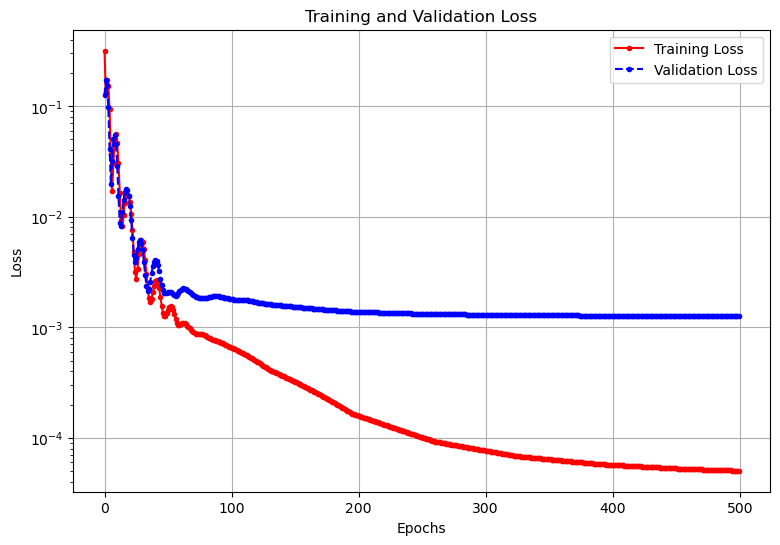

[9.0, 6.0]


In [9]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (9,6)

# list all data in history
print(history.history.keys())

# # summarize history for accuracy
# plt.plot(history.history['accuracy'], '-b.', label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], '--r.', label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# #plt.xlim(400,500)
# #plt.ylim(0,0.1)
# plt.legend()
# plt.grid()
# plt.show()

# summarize history for loss
plt.plot(history.history['loss'], '-r.', label='Training Loss')
plt.plot(history.history['val_loss'], '--b.', label='Validation Loss')
#loss = history.history['loss']
#val_loss = history.history['val_loss']
#epochs = range(1, len(loss) + 1)
#plt.plot(epochs, loss, '-r.', label='Training loss')
#plt.plot(epochs, val_loss, '--b.', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.xlim(400,500)
#plt.ylim(0,0.1)
plt.legend()
plt.semilogy()
plt.grid()
plt.show()

print(plt.rcParams["figure.figsize"])
#print(history.history)

In [10]:
EPOCHS_1 = 200
EPOCHS_2 = 500

# initialization/getting reproducible results
reset_seeds()

# Pre-train
initial_learning_rate = 0.020669824682365133
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=math.ceil(num_inputRawTrain/16)*65,
    decay_rate=0.575401007701697,
    staircase=True)
model_pre = tf.keras.Sequential()
checkpoint_filepath = './checkpoint/pre_train/pre_train_weights.hdf5' 
history_pre = train_model(model_pre,inputs_train_raw[0],outputs_train_raw[0],EPOCHS_1)
model_pre.load_weights(checkpoint_filepath) # load the best model
predict_with_FNN(model_pre,inputs_test,outputs_test)
print()

# Train with experimental data
mae_pretrain = []
mae_pretrain_iteration = []
mae_1_pretrain = []
mae_1_pretrain_iteration = []
mae_2_pretrain = []
mae_2_pretrain_iteration = []
pct95th_pretrain = []
pct95th_pretrain_iteration = []
std_pretrain = []
std_pretrain_iteration = []
mse_pretrain = []
mse_pretrain_iteration = []
mse_1_pretrain = []
mse_1_pretrain_iteration = []
mse_2_pretrain = []
mse_2_pretrain_iteration = []
ae_pretrain = []
ae_pretrain_iteration = []
# num_data_array = [1,10,20,50,100,200,500,1000,2000,3000]
# num_data_array = [50]
# num_data_array = [1,5,10,20,50,100,200,500,1000,2000]
# num_data_array = [20,100,200,300,500,700,1000,1500,1800,2000]
# num_data_array = [5,20,50,100,200,300,500,700,1000,2000]
# num_data_array = [20,50,100,200,300,500,700,1000,1500,2000]
# num_data_array = [20,40,60,80,100,300,500,700,900,1400]
# num_data_array = [20,50,100,200,300,500,700,900,1000,1400]
# num_data_array = [20,50,100,200,300,450,600,800,1100,1400]
# num_data_array = [10,30,50,100,150,200,300,400,500,550]
# num_data_array = [5,10,30,50,100,150,200,300,400,550]
# num_data_array = [1,5,10,30,50,100,200,300,400,550]
num_data_array = [5]
for x in range(len(num_data_array)):
    # Set learning rate
    initial_learning_rate = 0.020669824682365133
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate,
        decay_steps=math.ceil(num_data_array[x]/16)*65,
        decay_rate=0.575401007701697,
        staircase=True)
    
    mae_pretrain_iteration.append(num_data_array[x])
    mae_1_pretrain_iteration.append(num_data_array[x])
    mae_2_pretrain_iteration.append(num_data_array[x])
    pct95th_pretrain_iteration.append(num_data_array[x])
    std_pretrain_iteration.append(num_data_array[x])
    mse_pretrain_iteration.append(num_data_array[x])
    mse_1_pretrain_iteration.append(num_data_array[x])
    mse_2_pretrain_iteration.append(num_data_array[x])
    ae_pretrain_iteration.append(num_data_array[x])
    for num_train_iteration in range(1):
        # load pre-trained model
        pre_train_model_path = './checkpoint/pre_train/pre_train_weights.hdf5'  
        model_pre.load_weights(pre_train_model_path) # load the best model
        
        # prepare experimental data
        inputs_train_real_cut = inputs_train_real[num_train_iteration][0:0+num_data_array[x]]
        outputs_train_real_cut = outputs_train_real[num_train_iteration][0:0+num_data_array[x]]
#         inputs_train_real_cut = inputs_train_real[num_train_iteration]
#         outputs_train_real_cut = outputs_train_real[num_train_iteration]
        opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
#        model_pre.compile(optimizer=opt, loss='mse', metrics=['mse'])
        model_pre.compile(optimizer=opt, loss='mse', metrics=['mse']) 
        checkpoint_filepath = './checkpoint/pre_train/final_weights.hdf5' 
        model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_filepath,
            verbose = 1,
            monitor='val_mse',
            mode='auto',
            save_best_only=True)
        
        history = model_pre.fit(inputs_train_real_cut, outputs_train_real_cut, epochs=EPOCHS_2, batch_size=16, validation_data=(inputs_test, outputs_test), callbacks=[model_checkpoint_callback])
        model_pre.load_weights(checkpoint_filepath) # load the best model
        predict_results = predict_with_FNN(model_pre,inputs_test,outputs_test)
        print("Number of Data Trained: %.1f" % num_data_array[x])
        print("Iteration Times: %.1f" % num_train_iteration)
        
        mae_pretrain_iteration.append(predict_results[0])
        mae_1_pretrain_iteration.append(predict_results[1])
        mae_2_pretrain_iteration.append(predict_results[2])
        pct95th_pretrain_iteration.append(predict_results[3])
        std_pretrain_iteration.append(predict_results[4])
        mse_pretrain_iteration.append(predict_results[5])
        mse_1_pretrain_iteration.append(predict_results[6])
        mse_2_pretrain_iteration.append(predict_results[7])
        for i in range(num_inputTest):
            ae_pretrain_iteration.extend(predict_results[8][i])
        print()
    mae_pretrain.append(mae_pretrain_iteration)
    mae_pretrain_iteration = []
    mae_1_pretrain.append(mae_1_pretrain_iteration)
    mae_1_pretrain_iteration = []
    mae_2_pretrain.append(mae_2_pretrain_iteration)
    mae_2_pretrain_iteration = []
    pct95th_pretrain.append(pct95th_pretrain_iteration)
    pct95th_pretrain_iteration = []
    std_pretrain.append(std_pretrain_iteration)
    std_pretrain_iteration = []
    mse_pretrain.append(mse_pretrain_iteration)
    mse_pretrain_iteration = []
    mse_1_pretrain.append(mse_1_pretrain_iteration)
    mse_1_pretrain_iteration = []
    mse_2_pretrain.append(mse_2_pretrain_iteration)
    mse_2_pretrain_iteration = []
    ae_pretrain.append(ae_pretrain_iteration)
    ae_pretrain_iteration = []

Epoch 1/200
1335/1355 [============================>.] - ETA: 0s - loss: 0.0012 - mse: 0.0012
Epoch 1: val_mse improved from inf to 0.00029, saving model to ./checkpoint/pre_train\pre_train_weights.hdf5
1355/1355 [==============================] - 2s 869us/step - loss: 0.0012 - mse: 0.0012 - val_loss: 2.9258e-04 - val_mse: 2.9258e-04
Epoch 2/200
1284/1355 [===========================>..] - ETA: 0s - loss: 2.5683e-05 - mse: 2.5683e-05
Epoch 2: val_mse improved from 0.00029 to 0.00028, saving model to ./checkpoint/pre_train\pre_train_weights.hdf5
1355/1355 [==============================] - 1s 1ms/step - loss: 2.6441e-05 - mse: 2.6441e-05 - val_loss: 2.8437e-04 - val_mse: 2.8437e-04
Epoch 3/200
1345/1355 [============================>.] - ETA: 0s - loss: 1.5127e-05 - mse: 1.5127e-05
Epoch 3: val_mse did not improve from 0.00028
1355/1355 [==============================] - 1s 775us/step - loss: 1.5085e-05 - mse: 1.5085e-05 - val_loss: 2.9401e-04 - val_mse: 2.9401e-04
Epoch 4/200
1344/1355

1311/1355 [============================>.] - ETA: 0s - loss: 1.9054e-06 - mse: 1.9054e-06
Epoch 28: val_mse did not improve from 0.00026
1355/1355 [==============================] - 1s 728us/step - loss: 1.9512e-06 - mse: 1.9512e-06 - val_loss: 2.9250e-04 - val_mse: 2.9250e-04
Epoch 29/200
1280/1355 [===========================>..] - ETA: 0s - loss: 5.7416e-06 - mse: 5.7416e-06
Epoch 29: val_mse did not improve from 0.00026
1355/1355 [==============================] - 1s 732us/step - loss: 5.6309e-06 - mse: 5.6309e-06 - val_loss: 2.9096e-04 - val_mse: 2.9096e-04
Epoch 30/200
1285/1355 [===========================>..] - ETA: 0s - loss: 6.0509e-06 - mse: 6.0509e-06
Epoch 30: val_mse did not improve from 0.00026
1355/1355 [==============================] - 1s 726us/step - loss: 5.8651e-06 - mse: 5.8651e-06 - val_loss: 2.8025e-04 - val_mse: 2.8025e-04
Epoch 31/200
1304/1355 [===========================>..] - ETA: 0s - loss: 6.8955e-06 - mse: 6.8955e-06
Epoch 31: val_mse did not improve fro

1322/1355 [============================>.] - ETA: 0s - loss: 4.5798e-06 - mse: 4.5798e-06
Epoch 56: val_mse did not improve from 0.00026
1355/1355 [==============================] - 1s 741us/step - loss: 4.4807e-06 - mse: 4.4807e-06 - val_loss: 2.8009e-04 - val_mse: 2.8009e-04
Epoch 57/200
1350/1355 [============================>.] - ETA: 0s - loss: 4.0361e-06 - mse: 4.0361e-06
Epoch 57: val_mse did not improve from 0.00026
1355/1355 [==============================] - 1s 741us/step - loss: 4.0292e-06 - mse: 4.0292e-06 - val_loss: 2.8710e-04 - val_mse: 2.8710e-04
Epoch 58/200
1341/1355 [============================>.] - ETA: 0s - loss: 4.2660e-06 - mse: 4.2660e-06
Epoch 58: val_mse did not improve from 0.00026
1355/1355 [==============================] - 1s 736us/step - loss: 4.2315e-06 - mse: 4.2315e-06 - val_loss: 2.8897e-04 - val_mse: 2.8897e-04
Epoch 59/200
1285/1355 [===========================>..] - ETA: 0s - loss: 3.5485e-06 - mse: 3.5485e-06
Epoch 59: val_mse did not improve fro

1340/1355 [============================>.] - ETA: 0s - loss: 1.4703e-06 - mse: 1.4703e-06
Epoch 84: val_mse did not improve from 0.00026
1355/1355 [==============================] - 1s 743us/step - loss: 1.4573e-06 - mse: 1.4573e-06 - val_loss: 2.7684e-04 - val_mse: 2.7684e-04
Epoch 85/200
1305/1355 [===========================>..] - ETA: 0s - loss: 1.7406e-06 - mse: 1.7406e-06
Epoch 85: val_mse did not improve from 0.00026
1355/1355 [==============================] - 1s 884us/step - loss: 1.6952e-06 - mse: 1.6952e-06 - val_loss: 2.8073e-04 - val_mse: 2.8073e-04
Epoch 86/200
1308/1355 [===========================>..] - ETA: 0s - loss: 6.2692e-07 - mse: 6.2692e-07
Epoch 86: val_mse did not improve from 0.00026
1355/1355 [==============================] - 1s 868us/step - loss: 6.5875e-07 - mse: 6.5875e-07 - val_loss: 2.8846e-04 - val_mse: 2.8846e-04
Epoch 87/200
1298/1355 [===========================>..] - ETA: 0s - loss: 2.0287e-06 - mse: 2.0287e-06
Epoch 87: val_mse did not improve fro

1342/1355 [============================>.] - ETA: 0s - loss: 1.4442e-06 - mse: 1.4442e-06
Epoch 112: val_mse did not improve from 0.00026
1355/1355 [==============================] - 1s 748us/step - loss: 1.4340e-06 - mse: 1.4340e-06 - val_loss: 2.8206e-04 - val_mse: 2.8206e-04
Epoch 113/200
1350/1355 [============================>.] - ETA: 0s - loss: 1.0365e-06 - mse: 1.0365e-06
Epoch 113: val_mse did not improve from 0.00026
1355/1355 [==============================] - 1s 738us/step - loss: 1.0627e-06 - mse: 1.0627e-06 - val_loss: 2.6916e-04 - val_mse: 2.6916e-04
Epoch 114/200
1297/1355 [===========================>..] - ETA: 0s - loss: 1.2201e-06 - mse: 1.2201e-06
Epoch 114: val_mse did not improve from 0.00026
1355/1355 [==============================] - 1s 731us/step - loss: 1.2020e-06 - mse: 1.2020e-06 - val_loss: 2.8618e-04 - val_mse: 2.8618e-04
Epoch 115/200
1321/1355 [============================>.] - ETA: 0s - loss: 1.6419e-06 - mse: 1.6419e-06
Epoch 115: val_mse did not impr

1326/1355 [============================>.] - ETA: 0s - loss: 3.0859e-07 - mse: 3.0859e-07
Epoch 140: val_mse did not improve from 0.00026
1355/1355 [==============================] - 1s 737us/step - loss: 3.0637e-07 - mse: 3.0637e-07 - val_loss: 2.8311e-04 - val_mse: 2.8311e-04
Epoch 141/200
1311/1355 [============================>.] - ETA: 0s - loss: 3.6618e-07 - mse: 3.6618e-07
Epoch 141: val_mse did not improve from 0.00026
1355/1355 [==============================] - 1s 735us/step - loss: 3.8101e-07 - mse: 3.8101e-07 - val_loss: 2.8603e-04 - val_mse: 2.8603e-04
Epoch 142/200
1349/1355 [============================>.] - ETA: 0s - loss: 3.0414e-07 - mse: 3.0414e-07
Epoch 142: val_mse did not improve from 0.00026
1355/1355 [==============================] - 1s 748us/step - loss: 3.0431e-07 - mse: 3.0431e-07 - val_loss: 2.8333e-04 - val_mse: 2.8333e-04
Epoch 143/200
1312/1355 [============================>.] - ETA: 0s - loss: 5.7927e-07 - mse: 5.7927e-07
Epoch 143: val_mse did not impr

1331/1355 [============================>.] - ETA: 0s - loss: 4.1260e-07 - mse: 4.1260e-07
Epoch 168: val_mse did not improve from 0.00026
1355/1355 [==============================] - 1s 740us/step - loss: 4.0643e-07 - mse: 4.0643e-07 - val_loss: 2.8387e-04 - val_mse: 2.8387e-04
Epoch 169/200
1355/1355 [==============================] - ETA: 0s - loss: 3.1149e-07 - mse: 3.1149e-07
Epoch 169: val_mse did not improve from 0.00026
1355/1355 [==============================] - 1s 742us/step - loss: 3.1149e-07 - mse: 3.1149e-07 - val_loss: 2.8280e-04 - val_mse: 2.8280e-04
Epoch 170/200
1325/1355 [============================>.] - ETA: 0s - loss: 4.4317e-07 - mse: 4.4317e-07
Epoch 170: val_mse did not improve from 0.00026
1355/1355 [==============================] - 1s 743us/step - loss: 4.3968e-07 - mse: 4.3968e-07 - val_loss: 2.8202e-04 - val_mse: 2.8202e-04
Epoch 171/200
1295/1355 [===========================>..] - ETA: 0s - loss: 3.9739e-07 - mse: 3.9739e-07
Epoch 171: val_mse did not impr

1315/1355 [============================>.] - ETA: 0s - loss: 4.8636e-08 - mse: 4.8636e-08
Epoch 196: val_mse did not improve from 0.00026
1355/1355 [==============================] - 1s 748us/step - loss: 5.1071e-08 - mse: 5.1071e-08 - val_loss: 2.8404e-04 - val_mse: 2.8404e-04
Epoch 197/200
1305/1355 [===========================>..] - ETA: 0s - loss: 1.8101e-07 - mse: 1.8101e-07
Epoch 197: val_mse did not improve from 0.00026
1355/1355 [==============================] - 1s 735us/step - loss: 1.7543e-07 - mse: 1.7543e-07 - val_loss: 2.8217e-04 - val_mse: 2.8217e-04
Epoch 198/200
1322/1355 [============================>.] - ETA: 0s - loss: 8.6852e-08 - mse: 8.6852e-08
Epoch 198: val_mse did not improve from 0.00026
1355/1355 [==============================] - 1s 746us/step - loss: 8.9285e-08 - mse: 8.9285e-08 - val_loss: 2.8180e-04 - val_mse: 2.8180e-04
Epoch 199/200
1296/1355 [===========================>..] - ETA: 0s - loss: 1.1482e-07 - mse: 1.1482e-07
Epoch 199: val_mse did not impr

1/1 [==============================] - ETA: 0s - loss: 2.9562e-05 - mse: 2.9562e-05
Epoch 23: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 27ms/step - loss: 2.9562e-05 - mse: 2.9562e-05 - val_loss: 3.4178e-04 - val_mse: 3.4178e-04
Epoch 24/500
1/1 [==============================] - ETA: 0s - loss: 2.3805e-05 - mse: 2.3805e-05
Epoch 24: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 36ms/step - loss: 2.3805e-05 - mse: 2.3805e-05 - val_loss: 3.3036e-04 - val_mse: 3.3036e-04
Epoch 25/500
1/1 [==============================] - ETA: 0s - loss: 1.9390e-05 - mse: 1.9390e-05
Epoch 25: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 27ms/step - loss: 1.9390e-05 - mse: 1.9390e-05 - val_loss: 3.1483e-04 - val_mse: 3.1483e-04
Epoch 26/500
1/1 [==============================] - ETA: 0s - loss: 1.6867e-05 - mse: 1.6867e-05
Epoch 26: val_mse did not improve from 0.00021
1/1 [==============================

1/1 [==============================] - 0s 31ms/step - loss: 1.9223e-06 - mse: 1.9223e-06 - val_loss: 3.3250e-04 - val_mse: 3.3250e-04
Epoch 53/500
1/1 [==============================] - ETA: 0s - loss: 1.7014e-06 - mse: 1.7014e-06
Epoch 53: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 33ms/step - loss: 1.7014e-06 - mse: 1.7014e-06 - val_loss: 3.3411e-04 - val_mse: 3.3411e-04
Epoch 54/500
1/1 [==============================] - ETA: 0s - loss: 1.0938e-06 - mse: 1.0938e-06
Epoch 54: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 31ms/step - loss: 1.0938e-06 - mse: 1.0938e-06 - val_loss: 3.3515e-04 - val_mse: 3.3515e-04
Epoch 55/500
1/1 [==============================] - ETA: 0s - loss: 6.5545e-07 - mse: 6.5545e-07
Epoch 55: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 32ms/step - loss: 6.5545e-07 - mse: 6.5545e-07 - val_loss: 3.3656e-04 - val_mse: 3.3656e-04
Epoch 56/500
1/1 [==============

Epoch 82/500
1/1 [==============================] - ETA: 0s - loss: 7.8690e-08 - mse: 7.8690e-08
Epoch 82: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 32ms/step - loss: 7.8690e-08 - mse: 7.8690e-08 - val_loss: 3.3512e-04 - val_mse: 3.3512e-04
Epoch 83/500
1/1 [==============================] - ETA: 0s - loss: 8.5911e-08 - mse: 8.5911e-08
Epoch 83: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 31ms/step - loss: 8.5911e-08 - mse: 8.5911e-08 - val_loss: 3.3518e-04 - val_mse: 3.3518e-04
Epoch 84/500
1/1 [==============================] - ETA: 0s - loss: 8.1865e-08 - mse: 8.1865e-08
Epoch 84: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 32ms/step - loss: 8.1865e-08 - mse: 8.1865e-08 - val_loss: 3.3525e-04 - val_mse: 3.3525e-04
Epoch 85/500
1/1 [==============================] - ETA: 0s - loss: 6.4538e-08 - mse: 6.4538e-08
Epoch 85: val_mse did not improve from 0.00021
1/1 [=================

1/1 [==============================] - 0s 33ms/step - loss: 1.5957e-08 - mse: 1.5957e-08 - val_loss: 3.3481e-04 - val_mse: 3.3481e-04
Epoch 112/500
1/1 [==============================] - ETA: 0s - loss: 1.5372e-08 - mse: 1.5372e-08
Epoch 112: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 27ms/step - loss: 1.5372e-08 - mse: 1.5372e-08 - val_loss: 3.3470e-04 - val_mse: 3.3470e-04
Epoch 113/500
1/1 [==============================] - ETA: 0s - loss: 1.5300e-08 - mse: 1.5300e-08
Epoch 113: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 33ms/step - loss: 1.5300e-08 - mse: 1.5300e-08 - val_loss: 3.3466e-04 - val_mse: 3.3466e-04
Epoch 114/500
1/1 [==============================] - ETA: 0s - loss: 1.5256e-08 - mse: 1.5256e-08
Epoch 114: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 33ms/step - loss: 1.5256e-08 - mse: 1.5256e-08 - val_loss: 3.3472e-04 - val_mse: 3.3472e-04
Epoch 115/500
1/1 [=======

Epoch 141/500
1/1 [==============================] - ETA: 0s - loss: 6.5057e-09 - mse: 6.5057e-09
Epoch 141: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 36ms/step - loss: 6.5057e-09 - mse: 6.5057e-09 - val_loss: 3.3497e-04 - val_mse: 3.3497e-04
Epoch 142/500
1/1 [==============================] - ETA: 0s - loss: 6.3814e-09 - mse: 6.3814e-09
Epoch 142: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 34ms/step - loss: 6.3814e-09 - mse: 6.3814e-09 - val_loss: 3.3499e-04 - val_mse: 3.3499e-04
Epoch 143/500
1/1 [==============================] - ETA: 0s - loss: 6.2406e-09 - mse: 6.2406e-09
Epoch 143: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 29ms/step - loss: 6.2406e-09 - mse: 6.2406e-09 - val_loss: 3.3502e-04 - val_mse: 3.3502e-04
Epoch 144/500
1/1 [==============================] - ETA: 0s - loss: 6.1024e-09 - mse: 6.1024e-09
Epoch 144: val_mse did not improve from 0.00021
1/1 [=========

1/1 [==============================] - ETA: 0s - loss: 3.7497e-09 - mse: 3.7497e-09
Epoch 170: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 33ms/step - loss: 3.7497e-09 - mse: 3.7497e-09 - val_loss: 3.3498e-04 - val_mse: 3.3498e-04
Epoch 171/500
1/1 [==============================] - ETA: 0s - loss: 3.6786e-09 - mse: 3.6786e-09
Epoch 171: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 29ms/step - loss: 3.6786e-09 - mse: 3.6786e-09 - val_loss: 3.3498e-04 - val_mse: 3.3498e-04
Epoch 172/500
1/1 [==============================] - ETA: 0s - loss: 3.6087e-09 - mse: 3.6087e-09
Epoch 172: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 29ms/step - loss: 3.6087e-09 - mse: 3.6087e-09 - val_loss: 3.3498e-04 - val_mse: 3.3498e-04
Epoch 173/500
1/1 [==============================] - ETA: 0s - loss: 3.5397e-09 - mse: 3.5397e-09
Epoch 173: val_mse did not improve from 0.00021
1/1 [=======================

1/1 [==============================] - ETA: 0s - loss: 2.1731e-09 - mse: 2.1731e-09
Epoch 199: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 32ms/step - loss: 2.1731e-09 - mse: 2.1731e-09 - val_loss: 3.3498e-04 - val_mse: 3.3498e-04
Epoch 200/500
1/1 [==============================] - ETA: 0s - loss: 2.1481e-09 - mse: 2.1481e-09
Epoch 200: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 27ms/step - loss: 2.1481e-09 - mse: 2.1481e-09 - val_loss: 3.3499e-04 - val_mse: 3.3499e-04
Epoch 201/500
1/1 [==============================] - ETA: 0s - loss: 2.1233e-09 - mse: 2.1233e-09
Epoch 201: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 32ms/step - loss: 2.1233e-09 - mse: 2.1233e-09 - val_loss: 3.3499e-04 - val_mse: 3.3499e-04
Epoch 202/500
1/1 [==============================] - ETA: 0s - loss: 2.0990e-09 - mse: 2.0990e-09
Epoch 202: val_mse did not improve from 0.00021
1/1 [=======================

1/1 [==============================] - ETA: 0s - loss: 1.5479e-09 - mse: 1.5479e-09
Epoch 228: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 30ms/step - loss: 1.5479e-09 - mse: 1.5479e-09 - val_loss: 3.3499e-04 - val_mse: 3.3499e-04
Epoch 229/500
1/1 [==============================] - ETA: 0s - loss: 1.5294e-09 - mse: 1.5294e-09
Epoch 229: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 32ms/step - loss: 1.5294e-09 - mse: 1.5294e-09 - val_loss: 3.3499e-04 - val_mse: 3.3499e-04
Epoch 230/500
1/1 [==============================] - ETA: 0s - loss: 1.5111e-09 - mse: 1.5111e-09
Epoch 230: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 32ms/step - loss: 1.5111e-09 - mse: 1.5111e-09 - val_loss: 3.3499e-04 - val_mse: 3.3499e-04
Epoch 231/500
1/1 [==============================] - ETA: 0s - loss: 1.4931e-09 - mse: 1.4931e-09
Epoch 231: val_mse did not improve from 0.00021
1/1 [=======================

1/1 [==============================] - ETA: 0s - loss: 1.0828e-09 - mse: 1.0828e-09
Epoch 257: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 33ms/step - loss: 1.0828e-09 - mse: 1.0828e-09 - val_loss: 3.3500e-04 - val_mse: 3.3500e-04
Epoch 258/500
1/1 [==============================] - ETA: 0s - loss: 1.0692e-09 - mse: 1.0692e-09
Epoch 258: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 37ms/step - loss: 1.0692e-09 - mse: 1.0692e-09 - val_loss: 3.3500e-04 - val_mse: 3.3500e-04
Epoch 259/500
1/1 [==============================] - ETA: 0s - loss: 1.0557e-09 - mse: 1.0557e-09
Epoch 259: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 37ms/step - loss: 1.0557e-09 - mse: 1.0557e-09 - val_loss: 3.3500e-04 - val_mse: 3.3500e-04
Epoch 260/500
1/1 [==============================] - ETA: 0s - loss: 1.0423e-09 - mse: 1.0423e-09
Epoch 260: val_mse did not improve from 0.00021
1/1 [=======================

1/1 [==============================] - ETA: 0s - loss: 8.5525e-10 - mse: 8.5525e-10
Epoch 286: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 37ms/step - loss: 8.5525e-10 - mse: 8.5525e-10 - val_loss: 3.3500e-04 - val_mse: 3.3500e-04
Epoch 287/500
1/1 [==============================] - ETA: 0s - loss: 8.4885e-10 - mse: 8.4885e-10
Epoch 287: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 34ms/step - loss: 8.4885e-10 - mse: 8.4885e-10 - val_loss: 3.3500e-04 - val_mse: 3.3500e-04
Epoch 288/500
1/1 [==============================] - ETA: 0s - loss: 8.4247e-10 - mse: 8.4247e-10
Epoch 288: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 29ms/step - loss: 8.4247e-10 - mse: 8.4247e-10 - val_loss: 3.3500e-04 - val_mse: 3.3500e-04
Epoch 289/500
1/1 [==============================] - ETA: 0s - loss: 8.3614e-10 - mse: 8.3614e-10
Epoch 289: val_mse did not improve from 0.00021
1/1 [=======================

1/1 [==============================] - ETA: 0s - loss: 6.8400e-10 - mse: 6.8400e-10
Epoch 315: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 35ms/step - loss: 6.8400e-10 - mse: 6.8400e-10 - val_loss: 3.3501e-04 - val_mse: 3.3501e-04
Epoch 316/500
1/1 [==============================] - ETA: 0s - loss: 6.7863e-10 - mse: 6.7863e-10
Epoch 316: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 33ms/step - loss: 6.7863e-10 - mse: 6.7863e-10 - val_loss: 3.3501e-04 - val_mse: 3.3501e-04
Epoch 317/500
1/1 [==============================] - ETA: 0s - loss: 6.7329e-10 - mse: 6.7329e-10
Epoch 317: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 33ms/step - loss: 6.7329e-10 - mse: 6.7329e-10 - val_loss: 3.3501e-04 - val_mse: 3.3501e-04
Epoch 318/500
1/1 [==============================] - ETA: 0s - loss: 6.6797e-10 - mse: 6.6797e-10
Epoch 318: val_mse did not improve from 0.00021
1/1 [=======================

1/1 [==============================] - ETA: 0s - loss: 5.7625e-10 - mse: 5.7625e-10
Epoch 344: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 31ms/step - loss: 5.7625e-10 - mse: 5.7625e-10 - val_loss: 3.3501e-04 - val_mse: 3.3501e-04
Epoch 345/500
1/1 [==============================] - ETA: 0s - loss: 5.7356e-10 - mse: 5.7356e-10
Epoch 345: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 29ms/step - loss: 5.7356e-10 - mse: 5.7356e-10 - val_loss: 3.3501e-04 - val_mse: 3.3501e-04
Epoch 346/500
1/1 [==============================] - ETA: 0s - loss: 5.7082e-10 - mse: 5.7082e-10
Epoch 346: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 36ms/step - loss: 5.7082e-10 - mse: 5.7082e-10 - val_loss: 3.3501e-04 - val_mse: 3.3501e-04
Epoch 347/500
1/1 [==============================] - ETA: 0s - loss: 5.6813e-10 - mse: 5.6813e-10
Epoch 347: val_mse did not improve from 0.00021
1/1 [=======================

1/1 [==============================] - ETA: 0s - loss: 5.0136e-10 - mse: 5.0136e-10
Epoch 373: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 38ms/step - loss: 5.0136e-10 - mse: 5.0136e-10 - val_loss: 3.3501e-04 - val_mse: 3.3501e-04
Epoch 374/500
1/1 [==============================] - ETA: 0s - loss: 4.9891e-10 - mse: 4.9891e-10
Epoch 374: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 24ms/step - loss: 4.9891e-10 - mse: 4.9891e-10 - val_loss: 3.3501e-04 - val_mse: 3.3501e-04
Epoch 375/500
1/1 [==============================] - ETA: 0s - loss: 4.9645e-10 - mse: 4.9645e-10
Epoch 375: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 30ms/step - loss: 4.9645e-10 - mse: 4.9645e-10 - val_loss: 3.3501e-04 - val_mse: 3.3501e-04
Epoch 376/500
1/1 [==============================] - ETA: 0s - loss: 4.9401e-10 - mse: 4.9401e-10
Epoch 376: val_mse did not improve from 0.00021
1/1 [=======================

1/1 [==============================] - ETA: 0s - loss: 4.4403e-10 - mse: 4.4403e-10
Epoch 402: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 31ms/step - loss: 4.4403e-10 - mse: 4.4403e-10 - val_loss: 3.3501e-04 - val_mse: 3.3501e-04
Epoch 403/500
1/1 [==============================] - ETA: 0s - loss: 4.4273e-10 - mse: 4.4273e-10
Epoch 403: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 23ms/step - loss: 4.4273e-10 - mse: 4.4273e-10 - val_loss: 3.3501e-04 - val_mse: 3.3501e-04
Epoch 404/500
1/1 [==============================] - ETA: 0s - loss: 4.4144e-10 - mse: 4.4144e-10
Epoch 404: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 34ms/step - loss: 4.4144e-10 - mse: 4.4144e-10 - val_loss: 3.3501e-04 - val_mse: 3.3501e-04
Epoch 405/500
1/1 [==============================] - ETA: 0s - loss: 4.4016e-10 - mse: 4.4016e-10
Epoch 405: val_mse did not improve from 0.00021
1/1 [=======================

1/1 [==============================] - ETA: 0s - loss: 4.0733e-10 - mse: 4.0733e-10
Epoch 431: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 31ms/step - loss: 4.0733e-10 - mse: 4.0733e-10 - val_loss: 3.3501e-04 - val_mse: 3.3501e-04
Epoch 432/500
1/1 [==============================] - ETA: 0s - loss: 4.0610e-10 - mse: 4.0610e-10
Epoch 432: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 28ms/step - loss: 4.0610e-10 - mse: 4.0610e-10 - val_loss: 3.3501e-04 - val_mse: 3.3501e-04
Epoch 433/500
1/1 [==============================] - ETA: 0s - loss: 4.0488e-10 - mse: 4.0488e-10
Epoch 433: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 28ms/step - loss: 4.0488e-10 - mse: 4.0488e-10 - val_loss: 3.3501e-04 - val_mse: 3.3501e-04
Epoch 434/500
1/1 [==============================] - ETA: 0s - loss: 4.0364e-10 - mse: 4.0364e-10
Epoch 434: val_mse did not improve from 0.00021
1/1 [=======================

1/1 [==============================] - ETA: 0s - loss: 3.7441e-10 - mse: 3.7441e-10
Epoch 460: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 35ms/step - loss: 3.7441e-10 - mse: 3.7441e-10 - val_loss: 3.3501e-04 - val_mse: 3.3501e-04
Epoch 461/500
1/1 [==============================] - ETA: 0s - loss: 3.7375e-10 - mse: 3.7375e-10
Epoch 461: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 24ms/step - loss: 3.7375e-10 - mse: 3.7375e-10 - val_loss: 3.3501e-04 - val_mse: 3.3501e-04
Epoch 462/500
1/1 [==============================] - ETA: 0s - loss: 3.7305e-10 - mse: 3.7305e-10
Epoch 462: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 31ms/step - loss: 3.7305e-10 - mse: 3.7305e-10 - val_loss: 3.3501e-04 - val_mse: 3.3501e-04
Epoch 463/500
1/1 [==============================] - ETA: 0s - loss: 3.7238e-10 - mse: 3.7238e-10
Epoch 463: val_mse did not improve from 0.00021
1/1 [=======================

1/1 [==============================] - ETA: 0s - loss: 3.5498e-10 - mse: 3.5498e-10
Epoch 489: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 29ms/step - loss: 3.5498e-10 - mse: 3.5498e-10 - val_loss: 3.3502e-04 - val_mse: 3.3502e-04
Epoch 490/500
1/1 [==============================] - ETA: 0s - loss: 3.5431e-10 - mse: 3.5431e-10
Epoch 490: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 30ms/step - loss: 3.5431e-10 - mse: 3.5431e-10 - val_loss: 3.3502e-04 - val_mse: 3.3502e-04
Epoch 491/500
1/1 [==============================] - ETA: 0s - loss: 3.5364e-10 - mse: 3.5364e-10
Epoch 491: val_mse did not improve from 0.00021
1/1 [==============================] - 0s 26ms/step - loss: 3.5364e-10 - mse: 3.5364e-10 - val_loss: 3.3502e-04 - val_mse: 3.3502e-04
Epoch 492/500
1/1 [==============================] - ETA: 0s - loss: 3.5298e-10 - mse: 3.5298e-10
Epoch 492: val_mse did not improve from 0.00021
1/1 [=======================

In [11]:
print(mae_pretrain)
print(mae_1_pretrain)
print(mae_2_pretrain)
print(mse_pretrain)
print(mse_1_pretrain)
print(mse_2_pretrain)
print(ae_pretrain[0][1])
# print(model_pre.layers[1].get_weights())
# print(model_pre.weights)

[[5, 0.009206117230192398]]
[[5, 0.010066193307851376]]
[[5, 0.00834604115253342]]
[[5, 0.0002147177391253013]]
[[5, 0.00027617527362396645]]
[[5, 0.00015326020462663614]]
-0.0035530849033252217


dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


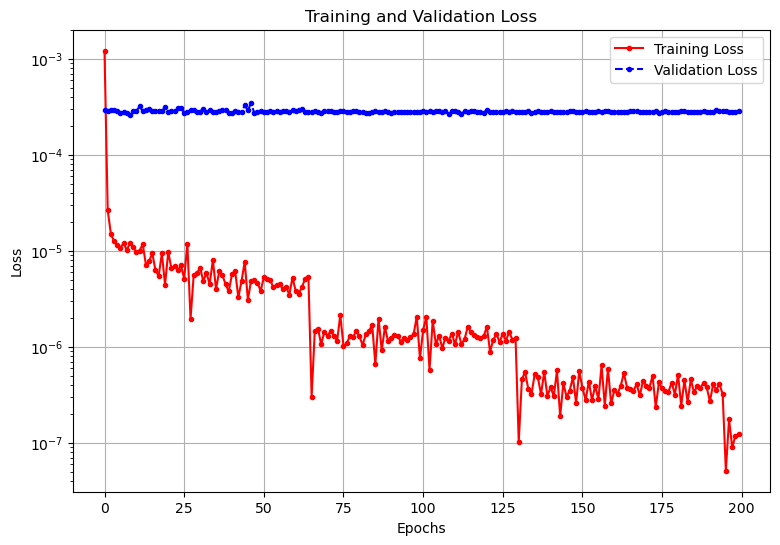

[9.0, 6.0]


In [12]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (9,6)

# list all data in history
print(history.history.keys())

# # summarize history for accuracy
# plt.plot(history_pre.history['accuracy'], '-b.', label='Training Accuracy')
# plt.plot(history_pre.history['val_accuracy'], '--r.', label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# #plt.xlim(400,500)
# #plt.ylim(0,0.1)
# plt.legend()
# plt.grid()
# plt.show()

# summarize history for loss
plt.plot(history_pre.history['loss'], '-r.', label='Training Loss')
plt.plot(history_pre.history['val_loss'], '--b.', label='Validation Loss')
#loss = history.history['loss']
#val_loss = history.history['val_loss']
#epochs = range(1, len(loss) + 1)
#plt.plot(epochs, loss, '-r.', label='Training loss')
#plt.plot(epochs, val_loss, '--b.', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.xlim(400,500)
#plt.ylim(0,0.1)
plt.legend()
plt.semilogy()
plt.grid()
plt.show()

print(plt.rcParams["figure.figsize"])
#print(history.history)

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


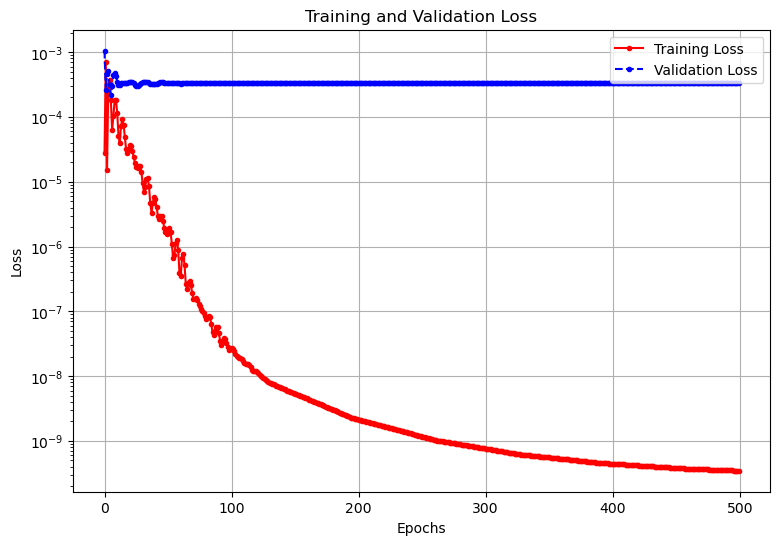

[9.0, 6.0]


In [13]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (9,6)

# list all data in history
print(history.history.keys())

# # summarize history for accuracy
# plt.plot(history.history['accuracy'], '-b.', label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], '--r.', label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# #plt.xlim(400,500)
# #plt.ylim(0,0.1)
# plt.legend()
# plt.grid()
# plt.show()

# summarize history for loss
plt.plot(history.history['loss'], '-r.', label='Training Loss')
plt.plot(history.history['val_loss'], '--b.', label='Validation Loss')
#loss = history.history['loss']
#val_loss = history.history['val_loss']
#epochs = range(1, len(loss) + 1)
#plt.plot(epochs, loss, '-r.', label='Training loss')
#plt.plot(epochs, val_loss, '--b.', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.xlim(400,500)
#plt.ylim(0,0.1)
plt.legend()
plt.semilogy()
plt.grid()
plt.show()

print(plt.rcParams["figure.figsize"])
#print(history.history)

In [14]:
# # Creat new directory
# import os
# os.mkdir('results')
import os
if not os.path.exists('results'):
    os.makedirs('results')
# Save Mean Squared Error of pretrained results
with open('./results/mse_results_pretrain.csv','w', newline="") as output_file:
    writer = csv.writer(output_file)
    writer.writerows(mse_pretrain)

# Save Mean Squared Error of non-pretrained results
with open('./results/mse_results_nopre.csv','w', newline="") as output_file:
    writer = csv.writer(output_file)
    writer.writerows(mse_direct)
    
# Save Mean Squared Error of pretrained results
with open('./results/mse_1_results_pretrain.csv','w', newline="") as output_file:
    writer = csv.writer(output_file)
    writer.writerows(mse_1_pretrain)

# Save Mean Squared Error of non-pretrained results
with open('./results/mse_1_results_nopre.csv','w', newline="") as output_file:
    writer = csv.writer(output_file)
    writer.writerows(mse_1_direct)

# Save Mean Squared Error of pretrained results
with open('./results/mse_2_results_pretrain.csv','w', newline="") as output_file:
    writer = csv.writer(output_file)
    writer.writerows(mse_2_pretrain)

# Save Mean Squared Error of non-pretrained results
with open('./results/mse_2_results_nopre.csv','w', newline="") as output_file:
    writer = csv.writer(output_file)
    writer.writerows(mse_2_direct)    
    
# Save Mean Absolute Error of pretrained results
with open('./results/mae_results_pretrain.csv','w', newline="") as output_file:
    writer = csv.writer(output_file)
    writer.writerows(mae_pretrain)

# Save Mean Absolute Error of non-pretrained results
with open('./results/mae_results_nopre.csv','w', newline="") as output_file:
    writer = csv.writer(output_file)
    writer.writerows(mae_direct)
    
# Save Mean Absolute Error of pretrained results
with open('./results/mae_1_results_pretrain.csv','w', newline="") as output_file:
    writer = csv.writer(output_file)
    writer.writerows(mae_1_pretrain)

# Save Mean Absolute Error of non-pretrained results
with open('./results/mae_1_results_nopre.csv','w', newline="") as output_file:
    writer = csv.writer(output_file)
    writer.writerows(mae_1_direct)
    
# Save Mean Absolute Error of pretrained results
with open('./results/mae_2_results_pretrain.csv','w', newline="") as output_file:
    writer = csv.writer(output_file)
    writer.writerows(mae_2_pretrain)

# Save Mean Absolute Error of non-pretrained results
with open('./results/mae_2_results_nopre.csv','w', newline="") as output_file:
    writer = csv.writer(output_file)
    writer.writerows(mae_2_direct)
    
# Save Absolute Error of pretrained results
with open('./results/ae_results_pretrain.csv','w', newline="") as output_file:
    writer = csv.writer(output_file)
    writer.writerows(ae_pretrain)

# Save Absolute Error of non-pretrained results
with open('./results/ae_results_nopre.csv','w', newline="") as output_file:
    writer = csv.writer(output_file)
    writer.writerows(ae_direct)
    
# Save 95th Percentage Error of pretrained results
with open('./results/pct95th_results_pretrain.csv','w', newline="") as output_file:
    writer = csv.writer(output_file)
    writer.writerows(pct95th_pretrain)

# Save 95th Percentage Error of non-pretrained results
with open('./results/pct95th_results_nopre.csv','w', newline="") as output_file:
    writer = csv.writer(output_file)
    writer.writerows(pct95th_direct)
    
# Save Standard Deviation of pretrained results
with open('./results/std_results_pretrain.csv','w', newline="") as output_file:
    writer = csv.writer(output_file)
    writer.writerows(std_pretrain)

# Save Standard Deviation of non-pretrained results
with open('./results/std_results_nopre.csv','w', newline="") as output_file:
    writer = csv.writer(output_file)
    writer.writerows(std_direct)

print("File generation complete!")    
# np.savetxt("phase_pred.csv", 
#            predict_results[3],
#            delimiter =", ", 
#            fmt ='% s')    

File generation complete!


In [15]:
# # Direct Train (Test Purpose)

# inputs_train_real_cut = inputs_train_real[0][10000:20000]
# outputs_train_real_cut = outputs_train_real[0][10000:20000]
# model_direct = tf.keras.Sequential()
# history = train_model(model_direct,inputs_train_real_cut,outputs_train_real_cut,500)
# predict_results = predict_with_FNN(model_direct,inputs_test,outputs_test)
# print()

In [16]:
# # Pre-train (Test Purpose)
# initial_learning_rate = 0.5
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#   initial_learning_rate,
#   decay_steps = 5000,
#   decay_rate=0.7,
#   staircase=True)
# model_pre = tf.keras.Sequential()
# checkpoint_filepath = './checkpoint/pre_train/pre_train_weights.hdf5' 
# train_model(model_pre,inputs_train_raw[0],outputs_train_raw[0],20)
# model_pre.load_weights(checkpoint_filepath) # load the best model
# predict_with_FNN(model_pre,inputs_test,outputs_test)
# print()

In [17]:
# weight1 = model_pre.layers[0].get_weights()[0]
# bias1 = model_pre.layers[0].get_weights()[1]


# weight2 = model_pre.layers[1].get_weights()[0]
# bias2 = model_pre.layers[1].get_weights()[1]

# bias = [bias1,bias2]

# print(weight1)
# print(bias1)
# print(weight2)
# print(bias2)

# with open('./training_parameter/weight1.csv','w', newline="") as output_file:
#     writer = csv.writer(output_file)
#     writer.writerows(weight1)
    
# with open('./training_parameter/bias.csv','w', newline="") as output_file:
#     writer = csv.writer(output_file)
# #     writer.writecolumnns(map(lambda x: [x], bias1))
#     writer.writerows(bias)
    
# with open('./training_parameter/weight2.csv','w', newline="") as output_file:
#     writer = csv.writer(output_file)
#     writer.writerows(weight2)
    
# # with open('./training_parameter/bias2.csv','w', newline="") as output_file:
# #     writer = csv.writer(output_file)
# #     writer.writerows(bias2)

In [18]:
# import numpy as np
# import math

# data1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# data2 = np.array([[3, 4, 5], [5, 6, 7], [8, 9, 10]])
# diff = data1 - data2
# MAE = np.mean(abs(diff))
# MSE = np.square(np.subtract(data1,data2)).mean()

# array = [100]
# print(MAE)
# print(MSE)
# print(array)
# math.ceil(100/64)

In [19]:
# # Example 1: Use numpy.append() function
# arr = np.array([[0,2,4],[6,8,10]]) 
# app_arr = np.append(arr, [13,15,17])
# print(app_arr)

# # Example 2: Appending array with axis=0
# arr = np.array([[0,2,4],[6,8,10]]) 
# app_arr=np.append(arr, [[5,7,9],[13,15,17]],axis = 0)
# print(app_arr)

# # Example 3: Use Append elements along axis 1
# arr = np.array([[0,2,4],[6,8,10]]) 
# app_arr=np.append(arr, [[5,7,9],[13,15,17]],axis = 1) 
# print(app_arr)

# # Example 4: Use appending array
# arr = np.arange(7)  
# arr1 = np.arange(9, 14)
# arr2 = np.append(arr, arr1)
# print("Appended arr2 : ", arr2)

In [20]:
# import numpy as np
# a = np.asarray([ [1,2,3], [4,5,6], [1,8,9] ])
# a.tofile('foo.csv',sep=',',format='%10.5f')

In [21]:
# a= [[1,2,3,4],[5,6,7,8]]
# a.extend([9,10])
# print(a)